(IN PROGRESS)


# Grundler et al. 2025 - `gaia`

In [30]:
import gaiapy as gp
import tskit
import numpy as np
import matplotlib.pyplot as plt

ts = tskit.load("continuous_space_ten_samples.trees")
ts_simple = ts.simplify()

Define sample locations as [node_id, x_coord, y_coord]
- node_id: Tree sequence node IDs (0-based)
- x_coord, y_coord: Geographic coordinates (any coordinate system)

In [31]:
spatial_dimensions = 2
sample_locations = np.zeros((ts.num_samples, spatial_dimensions+1))
for sample in ts.samples():
    location = ts.individual(ts.node(sample).individual).location
    sample_locations[sample] = np.array([sample, location[0], location[1]])
print(sample_locations)

[[ 0.         87.93595089 50.78275134]
 [ 1.         63.71522376 56.47398252]
 [ 2.         21.41498024 26.20901172]
 [ 3.          0.21672895 55.25619718]
 [ 4.         18.82533252 87.65092069]
 [ 5.         59.18223944 78.4027799 ]
 [ 6.         27.95544429 94.73601188]
 [ 7.         73.33354253 28.57466078]
 [ 8.         99.87559747 12.89871406]
 [ 9.         19.47314364 81.30175604]]


In [34]:
# Quadratic reconstruction (minimizes sum of squared Euclidean distances)
mpr_quad = gp.quadratic_mpr(ts_simple, sample_locations)
locations_quad = gp.quadratic_mpr_minimize(mpr_quad)
print(locations_quad)

[[51.1258927  43.45851678]
 [65.92776616 62.4328178 ]
 [37.39783557 61.06828245]
 [31.11415536 62.56122563]
 [20.71639343 79.48523273]
 [68.84299325 48.33009438]
 [16.77901861 66.45282794]
 [87.2980331  29.21778994]
 [70.22845772 39.29921562]
 [20.31581873 83.41124545]
 [19.99384345 82.60523676]
 [21.6830542  78.86303355]
 [17.09987485 59.247852  ]
 [65.06177791 60.10053196]
 [29.39984141 43.62432528]
 [81.83233685 28.96606943]
 [65.06177791 60.10053196]
 [72.28787054 45.42483346]
 [69.96949685 47.20789897]
 [49.68466913 45.41611213]]


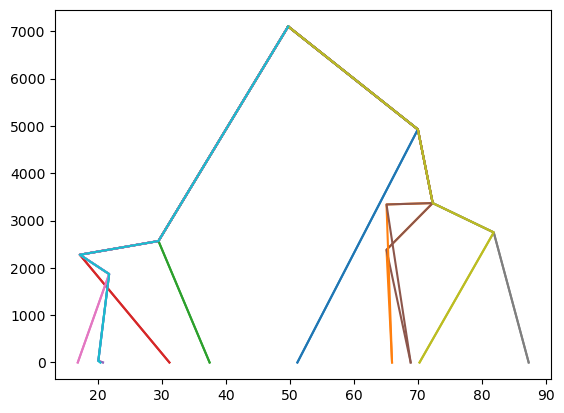

In [37]:
for tree in ts_simple.trees():

    for sample in ts_simple.samples():
    
        node = sample
        
        x_positions = [locations_quad[node][0]]
        y_positions = [locations_quad[node][1]]
        times = [tree.time(node)]
    
        node = tree.parent(node)
        while node != -1:
            x_positions.append(locations_quad[node][0])
            y_positions.append(locations_quad[node][1])
            times.append(tree.time(node))
            node = tree.parent(node)
    
        plt.plot(x_positions, times)

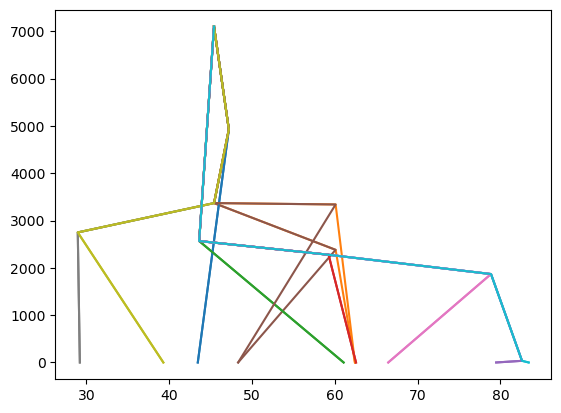

In [38]:
for tree in ts_simple.trees():

    for sample in ts_simple.samples():
    
        node = sample
        
        x_positions = [locations_quad[node][0]]
        y_positions = [locations_quad[node][1]]
        times = [tree.time(node)]
    
        node = tree.parent(node)
        while node != -1:
            x_positions.append(locations_quad[node][0])
            y_positions.append(locations_quad[node][1])
            times.append(tree.time(node))
            node = tree.parent(node)
    
        plt.plot(y_positions, times)